The idea behind quantum phase estimation is that given a unitary matrix $U$ that has $n$ eigenvectors. Given one of $U$'s eigenvector $|x_j>$, then $U|x_j> = {e^{i2\pi\theta_j}}|x_j>$, where ${e^{i2\pi\theta_j}}$ is the eigenvalue corresponding to the eigenvector $|x_j>$. $0<\theta_j<1$. Using quantum phase estimation (QPE), we need to find the value of $\theta_j$ which is the deciding factor for phase and hence this algorithm is called quantum phase estimation.

QPE is useful in simulating quantum mechanical systems since the evolution operators are unitary operators

In [34]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import QFT

from qiskit.visualization import *
from qiskit.quantum_info import Statevector
import operator


Step 1: Start with two registers of qubits, one register will be used as control register and
the other register will be used as target register

Step2: Have control unitary gates from the control to target register.

Step3: Then use inverse quantum fourier transform on first register to get the eigenvalue 

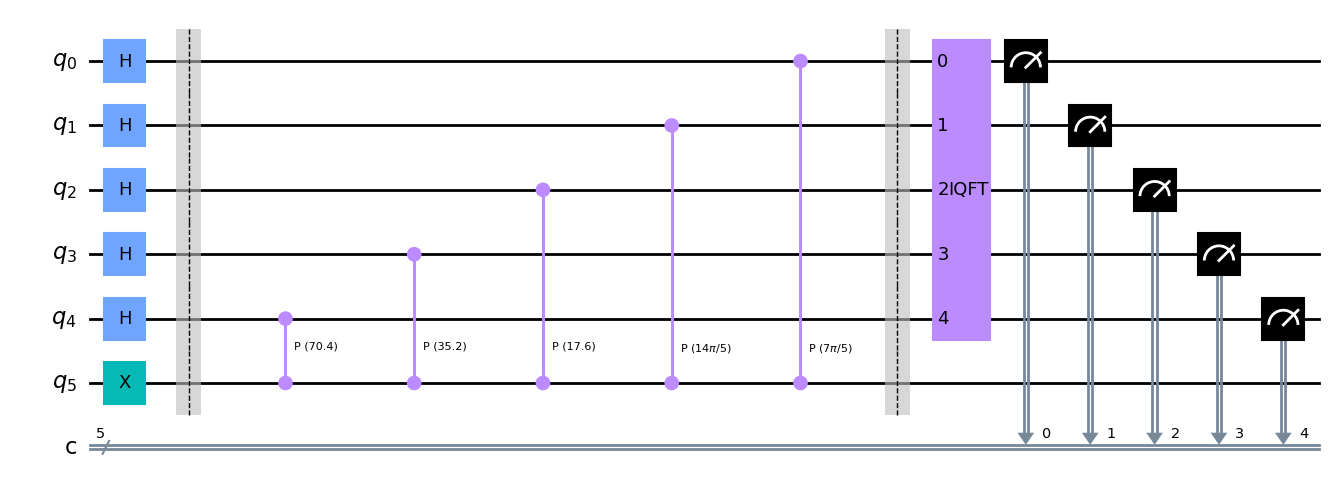

/Users/priyabratasenapati/opt/miniconda3/envs/QuantumML2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/priyabratasenapati/opt/miniconda3/envs/QuantumML2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


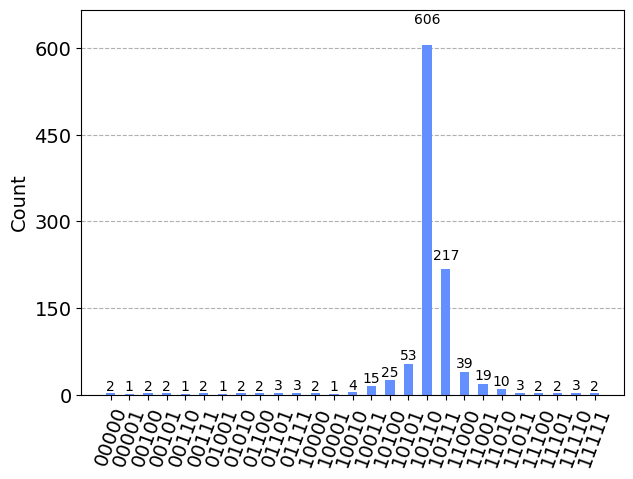

In [43]:
pi = np.pi

num_reg1 = 5
num_reg2 = 1
num_qubits = num_reg1+num_reg2
# number of register 1 qubits plus 1 for second register
qpec = QuantumCircuit(num_reg1+num_reg2, num_reg1)

for i in range(num_reg1):
    qpec.h(i)

# initialising the second register in 1 state to get the phase. If we do not initialse it to 1 state
#  we will get an eigenvalue of 1 which is not very interesting case
qpec.x(num_qubits-1)

qpec.barrier()

# since theta has to be in between 0 and 1. take any theta value. Here theta = 0.7
theta = 0.7

exp = num_reg1-1
for j in range(num_reg1-1, -1, -1):
   qpec.cp(2*pi*theta*(2**exp), j, num_qubits-1)
   exp-=1
qpec.barrier()    
    

# apply inverse fourier transform on the first register
qpec.append(QFT(num_reg1).inverse(), range(num_reg1))


# measure the qubits in first register
for i in range(num_reg1):
    qpec.measure(i,i)


display(qpec.draw('mpl'))


# if we multiply a unitary to a x state in register 2 in 
# state 1, we will get eigenvalue of epx(2*pi*i*theta). But the phase is theta.
# after measuring, we will get

backend = Aer.get_backend('qasm_simulator')
counts = execute(qpec, backend, shots = 1024).result().get_counts()
plot_histogram(counts)





Postprocessing to get the phase

In [44]:
#getting the highest probability count among all the counts
high_prob_count = max(counts.items(), key = operator.itemgetter(1))[0][::-1]
high_prob_count

'01101'

In [48]:
# converting binary string high_prob_count to decimal and then divide by 2**num_reg1 to get theta

calculated_theta = int(high_prob_count, 2)/(2**num_reg1)
print("Calculated phase angle is", calculated_theta, "for given theta", theta,"for", num_reg1, "qubits")


Calculated phase angle is 0.40625 for given theta 0.7 for 5 qubits
